# Project: Investigate a Dataset - No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
    <ul>
    <li><a href="#accessing">2.1. Accessing Data</a></li> 
        <ul>
        <li><a href="#general">2.1.1. General Properties</a></li>  
        <li><a href="#nan">2.1.2. NaN, Duplicates and Data Type</a></li>  
        <li><a href="#age">2.1.3. Age</a></li>  
        <li><a href='#accessing_conc'>2.1.4. Accessing Data - Summary</a></a>
        </ul>
    <li><a href='#cleaning'>2.2. Data Cleaning</a></a>
        <ul>
        <li><a href="#rename">2.2.1. Rename columns</a></li>
        <li><a href="#drop">2.2.2. Drop Rows</a></li>
        <li><a href="#Dopt">2.2.3. Change Display Options</a></li>
        <li><a href="#Dtype">2.2.4. Replace Values</a></li>
        <li><a href="#Dtime">2.2.5. Datetime / Date</a></li>
        <li><a href="#Cleaning_sum">2.2.6. Data Cleaning - Summary</a></li>
        </ul>
    </ul>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
     <ul>
    <li><a href="main_stat">3.1. Main Statistics</a></li>
    <li><a href="#gender">3.2. Gender</a></li>
    <li><a href="#age_">3.3. Age</a></li>
    <li><a href="#diseases">3.4. Diseases</a></li>
    <li><a href="#scholar">3.5. Scholarship / Welfare Aid</a></li>
    <li><a href="#sms">3.6. Sms received</a></li>
    <li><a href="#neigh">3.7. Neighbourhood</a></li>
    <li><a href="#mul">3.8. Patients with multiple appointments versus patients with a single appointment</a></li>
    <li><a href="#wait">3.9. Waiting Periods</a></li>
    </ul>
<li><a href="#conclusions">4. Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

In this project, we'll be analysing a dataset related to medical appointments in Brazil. In particular, we'll try to find trends in why patients didn't show up for their appointments and compare them with the trends of the patients who kept their appointments.  
  
The main questions we are trying to answer are:
- which factors had an impact on the attendance at appointments and which factors did not?
- were patients, who had multiple appointments, more likely to miss their appointments as patients who had only one appointment?
- did the waiting time between the date of appointment registration and the date of the actual appointment had an effect on the attendance? 


<a id='wrangling'></a>
## 2. Data Wrangling

In a first step, we'll only explore the data, analyse each column of the dataset, understand its meanings, question its data type and finally note any necessary changes. In a second step, we'll perform all the cleaning steps.
<a id='accessing'></a>
### 2.1. Accessing Data
<a id='general'></a>
#### 2.1.1. General Properties


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
# first rows of the dataset:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# numbers of rows and columns in the dataset:
df.shape

(110527, 14)

Here is a description of the 14 columns of the dataset:
><br>**PatientId**: Identification of the patient. 
<br>**AppointmentID**: Identification of the appointment.
<br>**Gender**: Male/Female.
<br>**Scheduled Day**: Day when the appointment has been made. Should have taken place bevor the AppointmentDay.
<br>**AppointmentDay**: Day for the doctor appointment.
<br>**Age**: Age of the patient.
<br>**Neighbourhood**: Place where the appointment took place
<br>**Scholarship**: does the patient benefit from the Bolsa Família, a social welfare programm that allows poor brazilian families to receive some financial aid (Footnote 1)
<br>**Hipertension**: does the patient suffer from Hypertension? True/False
<br>**Diabetes**: does the patient suffer from Diabetes? True/False
<br>**Alcoholism**: does the patient suffer from Alcoholism? True/False
<br>**Handcap**: how many handicaps does the patient have?
<br>**SMS_received**: how many sms did the patient receive?
<br>**No-show**: Did the patient miss this appointment? No: the patient showed up - Yes: the patient didn't show up

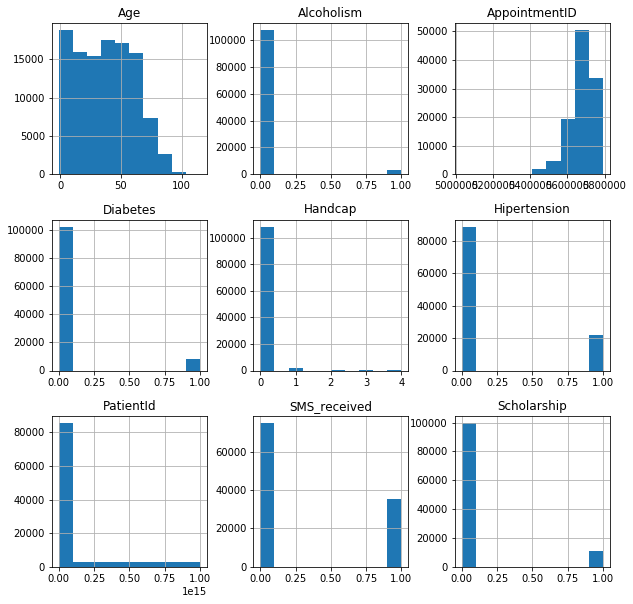

In [5]:
# histograms for the columns with numerical values
df.hist(figsize=(10,10));

We can clearly see here, that some histograms like AppointmentID or PatientId do not provide useful information, because histogram do not make sense for identification numbers.  
  Some histograms, such as Diabetes and Alcoholism, also show values 0 and 1, which may not be understandable.  
  We are going to check all these columns in the next steps.

In [6]:
# statistics for all columns of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


These statistics do not deliver much noticeable information about our dataset. However, column **Age** shows some particularities, such as the min and max values, that we'll analyse deeper.

<a id='nan'></a>
#### 2.1.2.  NaN, Duplicates and Data Type

Let's find out more about this dataset and look at the NaN values, duplicates and data types: 

In [7]:
# number of NaN in the dataset
df.isnull().sum().sum()

0

In [8]:
# number of duplicated rows in the dataset
df.duplicated().value_counts()

False    110527
dtype: int64

Currently, our dataframe contains 110527 rows in total, so there aren't any NaN values or duplicates.

In [9]:
# data type information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We should correct the spelling of some columns (**Hipertension**, **Handcap**) and standardize all the column names (lowercase, underscore).
<br>The identifications in the column **PatientId** are written in scientific notation. The column has Dtype float, we can simply leave the data type unchanged and adapt the display option for floats in Pandas.
<br>Both columns **Scheduled Day** and **AppointmentDay** have data type string. To make sure that the data type allows us to run some analysis, we should change it to **datatime**. We also have to check if the data is consistent (Scheduled Day < AppointmentDay).
<br>The columns **Scholarship**, **Hipertension**, **Diabetes**, **Alcoholism** all have data type integer. The values are currently 0 for No and 1 for Yes. To make our data more comprehensible, we should change the 0 / 1 values to No / Yes values. 

<a id='age'></a>
#### 2.1.3. Age
Let's take a closer look at the column **Age** as it shows some inconsistencies:

In [10]:
df['Age'].nunique()

104

The dataset has 104 different age values. Since this range is very large, let's have a closer look: 

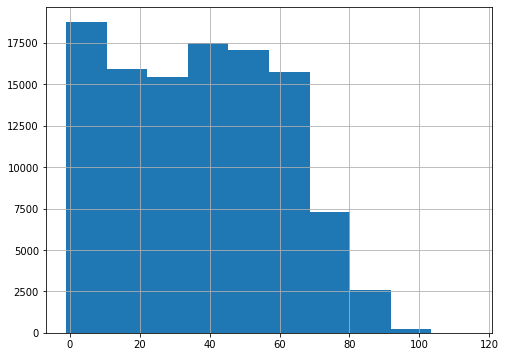

In [11]:
# repartition of the different ages
df['Age'].hist(figsize=(8,6)); 

In [12]:
# statistics of the column Age
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

The minimum and maximum values look like wrong values and/or outliers.

In [13]:
# select the rows with min age value:
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


This row contains apparently wrong age information. We'll drop it from the dataset.
<br>Now, let's analyse the high ages (above 99 years):

In [14]:
# Number of appointments with patients older than 99 years:
high_age = df.query('Age > 99')
high_age.PatientId.count()

11

In [15]:
# how many patients are older than 99 years:
high_age['PatientId'].nunique()

7

In [16]:
high_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
79270,9.739430e+12,5747809,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
79272,9.739430e+12,5747808,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
92084,5.578313e+13,5670914,F,2016-05-06T14:55:36Z,2016-06-03T00:00:00Z,100,ANTÔNIO HONÓRIO,0,0,0,0,0,1,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


The dataset contains 11 appointments from high aged patients who are above 99 years old. These appointments concerned 7 different patients. As this data doesn't show any inconsistencies, we'll keep it in the dataset.

<a id='accessing_conc'></a>
#### 2.1.4. Accessing Data - Summary



We've highlighted several points that now need to be cleaned up. Here a summary:  
><br> - Rename the columns **Hipertension** and **Handcap** and standardize the name of all other columns.
<br> - Drop the row with Age = -1.
<br> - Change the display options for floats in order to see the whole **PatientId** values and avoid scientific notations.
<br> - Change the data type of the columns **Scholarship, Hipertension, Diabetes, Alcoholism** and replace the values 0 and 1 with No and Yes.
<br> - Change the data type of the columns **Scheduled Day** and **AppointmentDay** and check their consistency.


<br>Let's do all these steps in the second part of the data wrangling: Data cleaning.

<a id='cleaning'></a>
### 2.2. Data Cleaning 
We are know going to clean the dataset according to the points listed above.

<a id='rename'></a>
#### 2.2.1. Rename Columns

In [17]:
# correct the spelling errors, separate the words with an underscore and apply lower case:
df.rename(columns={'PatientId': 'patient_id', 'AppointmentID': 'appointment_id', 'ScheduledDay': 'scheduled_day', 
                   'AppointmentDay': 'appointment_day','Hipertension': 'hypertension', 'Handcap': 'handicap', 
                   'No-show': 'no_show' }, inplace=True)
df.rename(columns=lambda x:x.lower(), inplace=True)
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

<a id='drop'></a>
#### 2.2.2. Drop Rows

In [18]:
# drop the row where age = -1
df.drop(index=df[df['age'] == -1].index, inplace=True)
df.shape

(110526, 14)

After dropping this single row, our dataset has now 110526 rows.

<a id='Dopt'></a>
#### 2.2.3. Change Display Options

In [19]:
# change the display option for floats in the dataframe to avoid scientic notations
pd.options.display.float_format = '{:.1f}'.format

In [20]:
# extract of the column 'patient_id' after changing the display option
df.head()['patient_id']

0    29872499824296.0
1   558997776694438.0
2     4262962299951.0
3      867951213174.0
4     8841186448183.0
Name: patient_id, dtype: float64

The values in the **patient_id** column have still data type float but are now fully readable (no scientific notations).  
We retain one decimal value in order to better compare and analyse future percentages.

<a id='Dtype'></a>
#### 2.2.4. Replace values
To ensure that the values are replaced completely, we first check the unique values in the columns **scholarship**, **hypertension**, **diabetes** and **alcoholism**:

In [21]:
# check the unique values in the columns 'scholarship', 'hypertension', 'diabetes' and 'alcoholism'
col = ['scholarship', 'hypertension','diabetes', 'alcoholism']
col_values = df[col].values
unique_values =  np.unique(col_values)
unique_values

array([0, 1], dtype=int64)

In [22]:
# replace values 0 and 1 with No and Yes 
df[col] = df[col].replace({0: 'No', 1: 'Yes'})

In [23]:
# check the new unique values in the columns 'scholarship', 'hypertension', 'diabetes' and 'alcoholism'
col_values = df[col].values
unique_values =  np.unique(col_values)
unique_values

array(['No', 'Yes'], dtype=object)

All values *0* and *1* have been replaced with *No* and *Yes*. The datatype changed automatically from integer to string.

<a id='Dtime'></a>
#### 2.2.5. Datetime / Date
The columns **scheduled_day** and **appointment_day** contain different information: only the column **scheduled_day** has a timestamp filled with data. To standardize both columns,  we're going to keep only the date information.

In [24]:
# example of current values in both columns
col = ['scheduled_day', 'appointment_day']
df[col].head(1)

,scheduled_day,appointment_day
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z


In [25]:
# data type information of the columns
df[col].dtypes

scheduled_day      object
appointment_day    object
dtype: object

In [26]:
# change data type in datetime and remove timestamp and timezone
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date

In [27]:
# extract of data after removing unnecessary information
df[col].head(1)

,scheduled_day,appointment_day
0,2016-04-29,2016-04-29


Now, we need to make sure, that the data in both columns is plausible: the scheduled day should have taken place before or at least on the same day as the appointment day. Let's create a new column **waiting_period_days** representing the timedelta between both columns **appointment_day** and **scheduled_day**:

In [28]:
# new column representing the waiting period
df['waiting_period_days'] = df['appointment_day'] - df['scheduled_day']

In [29]:
# extract of the new column 'waiting_period_days'
df[['scheduled_day', 'appointment_day', 'waiting_period_days']].head(1)

,scheduled_day,appointment_day,waiting_period_days
0,2016-04-29,2016-04-29,0 days


In [30]:
# current data types of all columns
df.dtypes

patient_id                     float64
appointment_id                   int64
gender                          object
scheduled_day                   object
appointment_day                 object
age                              int64
neighbourhood                   object
scholarship                     object
hypertension                    object
diabetes                        object
alcoholism                      object
handicap                         int64
sms_received                     int64
no_show                         object
waiting_period_days    timedelta64[ns]
dtype: object

The new column **waiting_period_days** has data type *timedelta*. As we want this column to represent only day values, we're going to select the day component of the values. This will change the data type to float and will facilitate future analyses:

In [31]:
# replace the values in the column 'waiting_period_days' with the component day of the timedelta
df['waiting_period_days'] = df['waiting_period_days'].dt.components.days

Now, let's take a look at our data in the new column **waiting_period_days** to check if some values need to be cleaned up:

In [32]:
# statistics of the new column 'waiting_period_days' 
df['waiting_period_days'].describe()

count   110526.0
mean        10.2
std         15.3
min         -6.0
25%          0.0
50%          4.0
75%         15.0
max        179.0
Name: waiting_period_days, dtype: float64

In [33]:
# number of appointments according to the waiting period
df.groupby('waiting_period_days').size()

waiting_period_days
-6          1
-1          4
 0      38562
 1       5213
 2       6725
        ...  
 155       10
 162       11
 169        8
 176       16
 179       10
Length: 131, dtype: int64

We can see that two waiting periods are incorrect: -6 days and -1 day. These values insinuate that the appointment registration took place after the actual appointment. Let's drop these rows: 

In [34]:
# drop rows with a waiting period less than 0 days
df.drop(index=df[df['waiting_period_days'] < 0].index, inplace=True)

In [35]:
# number of appointments per waiting period after dropping the rows
df.groupby('waiting_period_days').size()

waiting_period_days
0      38562
1       5213
2       6725
3       2737
4       5290
       ...  
155       10
162       11
169        8
176       16
179       10
Length: 129, dtype: int64

Another noticeable point is the waiting period of 0 day which counts 38562 appointments. These could represent spontaneous and/or urgent appointments or perhaps even wrong data. As we do not have enough information about this in our dataset, we'll keep the data.

<a id='Cleaning_sum'></a>
#### 2.2.6. Data Cleaning - Summary
We did following steps:
><br> - Renaming columns to get standardized names.
<br> - Dropping a row with inconsistent age value.
<br> - Changing the display options for float values to get readable patient identifications.
<br> - Replacing 0/1 values with No/Yes values to get more a comprehensible dataset.
<br> - Manipulating the columns with date values and adding a new column **waiting_period_days** representing the waiting time in days for an appointment.

We can now start to analyse the dataset.

<a id='eda'></a>
## 3. Exploratory Data Analysis
First, we'll analyse the main statistics of our dataset. Then, we'll analyse each single factor and their impact on the attendances at appointments. If an influence is detected, we will observe the factor more closely.
<a id='main_stat'></a>
### 3.1. Main Statistics

In [36]:
# number of appointments in our dataset
total = df['appointment_id'].count()
total

110521

In [37]:
# number of patients in our dataset
patients = df.groupby('patient_id').size().count()
females = df.query('gender == "F"').groupby('patient_id').size().count()
males = df.query('gender == "M"').groupby('patient_id').size().count()
patients, females, males

(62298, 40045, 22253)

In [38]:
# percentage of men and women
pct_males = males / patients * 100
pct_females = females / patients * 100
pct_males, pct_females

(35.720247841022186, 64.27975215897781)

Out dataset contains 110521 appointments of 62298 patients. About 64.3% of the patients are females, 35.7% are males.  
  
  Let's analyse the number of appointments per patient:

In [39]:
# mean and median number of appointments by patient id
df.groupby('patient_id').size().mean(), df.groupby('patient_id').size().median()

(1.7740697935728273, 1.0)

The mean number of appointements per patient is 1.77.  
The median number of appointments per patient is 1.0.  

Let's take a look at how many patients have made 50% of all appointments: First we sort all patients by the amount of their appointments (descending order, largest first). Then we cumulate the sums of appointments and select all patients who made the first 50% of all appointments:

In [40]:
# number of patients (sorted by appointment number per patient in a descending order) who made 50% of all appointments
patients_cumsum = df.groupby('patient_id').size().sort_values(ascending=False).cumsum()
patients_50pct = patients_cumsum[patients_cumsum < (df.shape[0]/2)]
patients_50pct.count()

15707

15707 of 62298 patients (25.21%) made 50% of all appointments.

Next, let's separate the attended and unattended appointments. For that, we create two filters: *no_show_up* for all unattended appointments and *show_up* for all attended appointments. We're going to use these filters throughout our analysis.

In [41]:
no_show_up = df['no_show'] == 'Yes'
show_up = df['no_show'] == 'No'

In [42]:
# number of attended and unattended appointments
num_show_up = show_up.sum()
num_no_show_up = no_show_up.sum()
num_show_up, num_no_show_up 

(88207, 22314)

In [43]:
# percentage of attendance and unattendance
pct_show_up = num_show_up / total * 100
pct_no_show_up = num_no_show_up / total * 100
pct_show_up, pct_no_show_up

(79.81017182254956, 20.18982817745044)

Overall, 79,8 % of the appointments have been attendend whereas 20,2% of the appointments have been missed.

Now, let's have a look at the period on which the appointments took place:

In [44]:
df['appointment_day'].min(), df['appointment_day'].max()

(datetime.date(2016, 4, 29), datetime.date(2016, 6, 8))

All 110521 appointments took place between 29 April 2016 and 8 June 2016.  

Summary of the main statistics of the dataset:
- There are 110521 appointments in the dataset, made by 62298 patients. About 35.7% are men, 64.3% are women.
- The mean number of appointements per patient is 1.77.
- About 25.21% of the patients made 50% of all appointments.
- 20.2% of the appointments were missed - 79.8% of the patients showed up.
- All appointments took place between 29 April 2016 and 8 June 2016. 


<br> Now that we have a good intuition for the main statistics of our dataset, let's analyse the single factors and their impact on the attendance at the appointments:
- gender  
- age  
- diseases  
- scholarship/welfare aid  
- sms received
- neighbourhood/places of the appointments 

<br> After analysing all these single factors, we'll analyse trends of:
 - patients with multiple appointments versus patients with a single appointment
 - the waiting periods between schedules and appointments


<a id='gender'></a>
### 3.2. Gender
We're going to compare the gender of patients who did'nt show up for their appointments and the ones who did show up.  
We'll filter our main dataset *df* to create a new one named *df_gender_att*. For that, let's create a function *df_byattendance*, which can also be used later for the other factors:

In [45]:
# function 'df_attendance' that returns a concatenation of the series t, su and nsu (will be defined for each factor) 
# & percentage calculation for each series per attendance status
def df_byattendance(t, su, nsu):
    x = pd.concat([t.value_counts(), 
            t.value_counts(normalize=True).mul(100),
            su.value_counts(), 
            su.value_counts(normalize=True).mul(100),
            nsu.value_counts(), 
            nsu.value_counts(normalize=True).mul(100)],axis=1, 
            keys=('total', 'total_%','show_up','show_up_%', 'no_show_up','no_show_up_%'))
    return x

In [46]:
# series of the factor 'gender' in total (t), showed up (su) and not showed up (nsu)
t = df['gender']
su = df[show_up]['gender']
nsu = df[no_show_up]['gender']

In [47]:
# new dataframe 'df_gender_att' resulting from calling function df_byattendance
df_gender_att = df_byattendance(t, su, nsu)
df_gender_att

,total,total_%,show_up,show_up_%,no_show_up,no_show_up_%
F,71836,65.0,57245,64.9,14591,65.4
M,38685,35.0,30962,35.1,7723,34.6


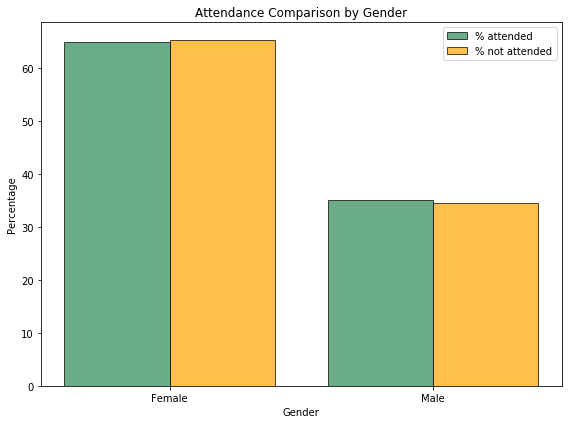

In [48]:
plt.figure(figsize=(8, 6))
x_ind = np.arange(len(df_gender_att['show_up_%'])) 
width = 0.4
plt.bar(x_ind, df_gender_att['show_up_%'], width, color='seagreen', edgecolor='black', alpha=0.7, label='% attended')
plt.bar(x_ind + width, df_gender_att['no_show_up_%'], width, color='orange', edgecolor='black', alpha=0.7, label='% not attended')
labels = ['Female', 'Male']
locations = x_ind + width / 2
plt.xticks(locations, labels)
plt.title('Attendance Comparison by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.tight_layout()
plt.legend();

In total, 65% of the appointments have been made by females. This dimension is also reflected in the attended appointments, as well as in the unattended appointments where the breakdown similar is.
<br>
<br>Let's analyse the gender behavior: Do men rather miss their appointment than women?  
For that, we're going to create another function, called *df_byfactor* which can also be used later for the other factors:

In [49]:
# function 'df_byfactor' that returns a concatenation of the series t, su and nsu (will be defined for each factor) 
# & percentage calculation for each series per factor characteristic
def df_byfactor(t, su, nsu):
    x = pd.concat([t.value_counts(), 
            (t.value_counts() / t.value_counts()).mul(100),
            su.value_counts(), 
            (su.value_counts() / t.value_counts() *100),
            nsu.value_counts(), (nsu.value_counts() / t.value_counts() *100) ],
            axis=1, keys=('total', 'total_%', 'show_up', 'show_up_%', 'no_show_up', 'no_show_up_%'))
    return x

In [50]:
# new dataframe 'df_gender_fac' resulting from calling function df_byfactor
df_gender_fac = df_byfactor(t, su, nsu)
df_gender_fac

,total,total_%,show_up,show_up_%,no_show_up,no_show_up_%
F,71836,100.0,57245,79.7,14591,20.3
M,38685,100.0,30962,80.0,7723,20.0


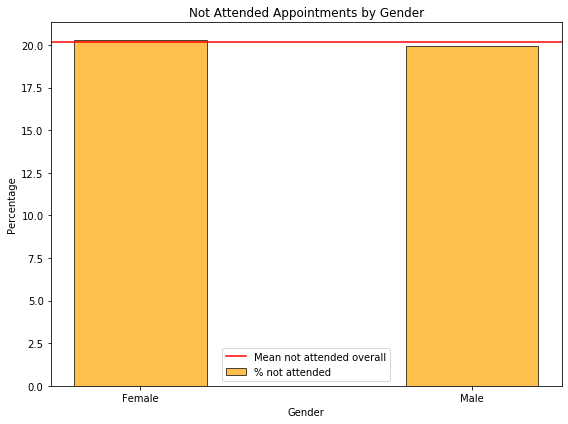

In [51]:
plt.figure(figsize=(8, 6))
x_ind = np.arange(len(df_gender_fac['total'])) 
width = 0.4
plt.bar(x_ind, df_gender_fac['no_show_up_%'], width, color='orange', edgecolor='black', alpha=0.7, label='% not attended')
locations = x_ind
plt.xticks(locations, labels)
plt.title('Not Attended Appointments by Gender')
plt.axhline(y=pct_no_show_up, color='r', linestyle='-', label='Mean not attended overall')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.tight_layout()
plt.legend();

Men miss their appointments only slightly less often than women. In both cases about 20% of the appointments were not attended.

<a id='age_'></a>
### 3.3. Age
Does the age of the patients have an influence on their attendance at appointments?  
We'll compare the median and mean ages of our three different groups: all / not attended / attended appointments.  
Additionally, we'll take a look at the distribution of the ages and analyse which age has the highest percentage rate of non-attendance.

In [52]:
# series of the factor 'age' in total (t), showed up (su) and not showed up (nsu)
t = df['age']
su = df[show_up]['age']
nsu = df[no_show_up]['age']

In [53]:
# median and mean age of the whole dataset
t.median(), t.mean()

(37.0, 37.08938572759928)

In [54]:
# median and mean age of the patients who didn't show up to their appointment
nsu.median(), nsu.mean()

(33.0, 34.31787218786412)

In [55]:
# median and mean age of the patients who did show up to their appointment
su.median(), su.mean()

(38.0, 37.790504154999034)

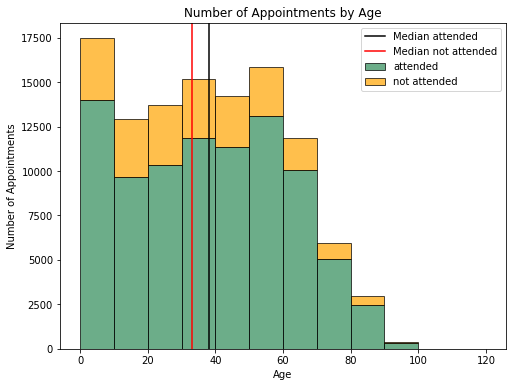

In [56]:
plt.figure(figsize=(8, 6))
x = [su, nsu]
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120]
plt.hist(x, bins=bins, edgecolor='black', color=('seagreen', 'orange'), label=('attended', 'not attended'), stacked=True, alpha=0.7)
plt.axvline(su.median(), color='black', label='Median attended')
plt.axvline(nsu.median(), color='red', label='Median not attended')
plt.title('Number of Appointments by Age')
plt.xlabel('Age')
plt.ylabel('Number of Appointments')
plt.legend();

We can see that both mean and median age of patients who didn't show up for their appointment are lower than in the other groups.  
Let's take a closer look at the percentage rate of missed appointments by age. To analyse this, we're going to create a new dataframe *df_age*:

In [57]:
# new dataframe 'df_age_fac' resulting from calling function df_byfactor
df_age_fac = df_byfactor(t, su, nsu)
df_age_fac.reset_index(inplace=True) # put the index as column
df_age_fac.rename(columns={'index':'age'}, inplace=True) # rename the new column
df_age_fac

,age,total,total_%,show_up,show_up_%,no_show_up,no_show_up_%
0,0,3539,100.0,2900,81.9,639.0,18.1
1,1,2273,100.0,1858,81.7,415.0,18.3
2,2,1618,100.0,1366,84.4,252.0,15.6
3,3,1513,100.0,1236,81.7,277.0,18.3
4,4,1299,100.0,1017,78.3,282.0,21.7
...,...,...,...,...,...,...,...
98,98,6,100.0,5,83.3,1.0,16.7
99,99,1,100.0,1,100.0,nan,nan
100,100,4,100.0,4,100.0,nan,nan
101,102,2,100.0,2,100.0,nan,nan


This dataframe *df_age_fac* shows the number of total, attended and unattended appointments by age. Additionaly, we can see the percentage of attendance per age.  
Let's group the ages in bins of 10:

In [58]:
# dataframe for percentage rate per attendance status, consolidated in age groups
df_age_fac = df_age_fac.groupby(pd.cut(df_age_fac['age'], bins)).mean()[['show_up_%', 'no_show_up_%']]
df_age_fac

,show_up_%,no_show_up_%
age,,
"(0, 10]",79.0,21.0
"(10, 20]",74.7,25.3
"(20, 30]",75.3,24.7
"(30, 40]",78.5,21.5
"(40, 50]",80.0,20.0
"(50, 60]",82.6,17.4
"(60, 70]",85.3,14.7
"(70, 80]",84.4,15.6
"(80, 90]",84.0,16.0


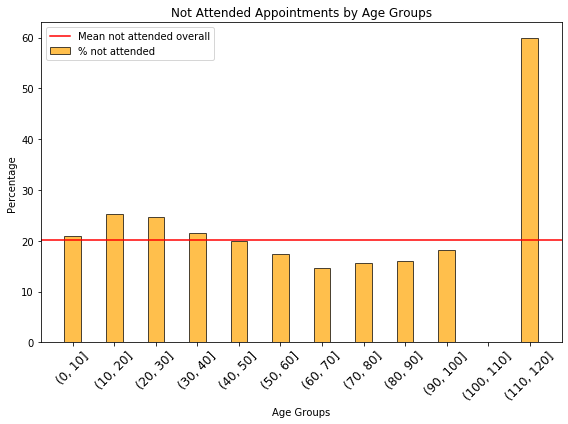

In [59]:
plt.figure(figsize=(8, 6))
x_ind = np.arange(len(df_age_fac['show_up_%'])) 
width = 0.4
labels = df_age_fac.index
plt.bar(x_ind, df_age_fac['no_show_up_%'], width, color='orange', edgecolor='black', alpha=0.7, label='% not attended')
locations = x_ind
plt.axhline(y=pct_no_show_up, color='r', linestyle='-', label='Mean not attended overall')
plt.xticks(locations, labels, fontsize=12, rotation=45)
plt.title('Not Attended Appointments by Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Percentage')
plt.tight_layout()
plt.legend();

We see that especially the age groups 10-20 and 20-30 are above the overall average of non-attendance.  
The percentage rate of 60% in the age group 110-120 is very high, but only concerns 5 appointments. Therefore, this age group should not be included in this analysis.

<a id='diseases'></a>
### 3.4. Diseases
Does the diseases or disabilities of the patients have an influence on their attendance at appointments?  
First, we're going to set up some dataframes for all factors and make a comparison of the non-attendance percentage rates with the overall data of dataset *df*.

In [60]:
# series of the factors 'Alcoholism', 'Hypertension', 'Diabetes' and 'Handicap' 
alc = df.query('alcoholism == "Yes"')['no_show']
diab = df.query('diabetes == "Yes"')['no_show']
hyp = df.query('hypertension == "Yes"')['no_show']
hand = df.query('handicap > 0')['no_show']

In [61]:
# series of appointements where the patient isn't affected by one of the diseases listed above
no_disease = df.query('alcoholism == "No" and diabetes == "No" and hypertension == "No" and handicap == 0')['no_show']

In [62]:
# new dataframe 'df_diseases' with percentage rate comparison of attended and non-attended appointments
df_diseases = pd.concat([no_disease.value_counts(normalize=True).mul(100), 
                 alc.value_counts(normalize=True).mul(100), 
                 diab.value_counts(normalize=True).mul(100), 
                 hyp.value_counts(normalize=True).mul(100), 
                 hand.value_counts(normalize=True).mul(100)], axis=1, 
                keys=('no_disease_%','alcoholism_%', 'diabetes_%', 'hypertension_%', 'handicap_%'))
df_diseases

,no_disease_%,alcoholism_%,diabetes_%,hypertension_%,handicap_%
No,79.1,79.9,82.0,82.7,81.9
Yes,20.9,20.1,18.0,17.3,18.1


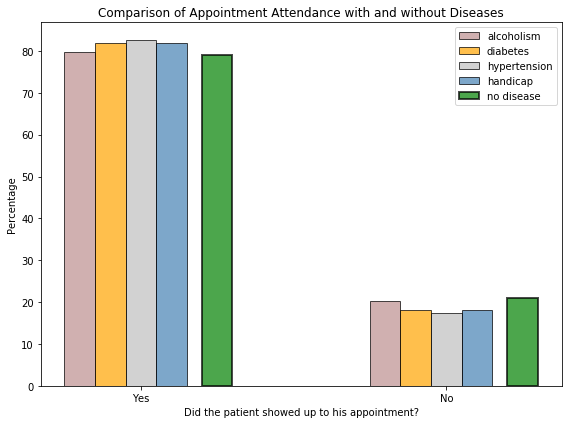

In [63]:
plt.figure(figsize=(8, 6))
x_ind = np.arange(len(df_diseases['alcoholism_%'])) 
width = 0.1
plt.bar(x_ind, df_diseases['alcoholism_%'], width, color='rosybrown', edgecolor='black', alpha=0.7, label='alcoholism')
plt.bar(x_ind + width, df_diseases['diabetes_%'], width, color='orange', edgecolor='black', alpha=0.7, label='diabetes')
plt.bar(x_ind + (width*2), df_diseases['hypertension_%'], width, color='silver', edgecolor='black', alpha=0.7, label='hypertension')
plt.bar(x_ind + (width*3), df_diseases['handicap_%'], width, color='steelblue', edgecolor='black', alpha=0.7, label='handicap')
plt.bar(x_ind + (width*4.5), df_diseases['no_disease_%'], width, color='green', edgecolor='black', linewidth=2, alpha=0.7, label='no disease')
labels = ['Yes', 'No']
locations = x_ind + width*2
plt.xticks(locations, labels)
plt.title('Comparison of Appointment Attendance with and without Diseases')
plt.xlabel('Did the patient showed up to his appointment?')
plt.ylabel('Percentage')
plt.tight_layout()
plt.legend();

In average, patients with diseases and/or disabilities are more likely to come to their appointment than patients without these diseases. Patients with hypertension in particular were only 17.3% of the cases that did not come to their appointment.

<a id='scholar'></a>
### 3.5. Scholarship / Welfare Aid
Have the attendances at appointments been influenced by social welfare?  
Let's first create a new dataframe for the factor *scholarship* and analyse the percentage rates of non-attended appointments.

In [64]:
# series of factor'scholarship' in total (t), showed up (su) and not showed up (nsu)
t = df['scholarship']
su = df[show_up]['scholarship']
nsu = df[no_show_up]['scholarship']

In [65]:
# new dataframe 'df_welfare_att' resulting from calling function df_byattendance
df_welfare_att = df_byattendance(t, su, nsu)
df_welfare_att

,total,total_%,show_up,show_up_%,no_show_up,no_show_up_%
No,99660,90.2,79924,90.6,19736,88.4
Yes,10861,9.8,8283,9.4,2578,11.6


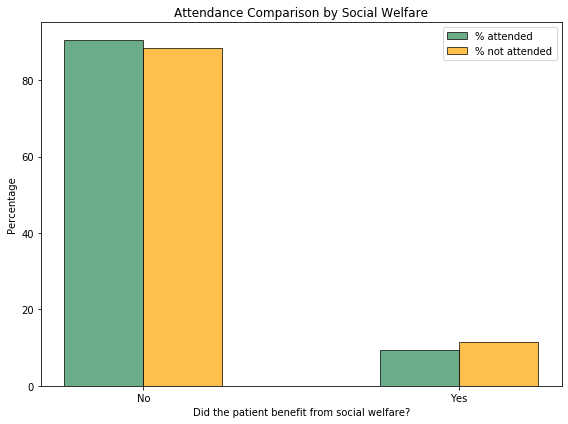

In [66]:
plt.figure(figsize=(8, 6))
x_ind = np.arange(len(df_welfare_att['show_up_%'])) 
width = 0.25
plt.bar(x_ind, df_welfare_att['show_up_%'], width, color='seagreen', edgecolor='black', alpha=0.7, label='% attended')
plt.bar(x_ind + width, df_welfare_att['no_show_up_%'], width, color='orange', edgecolor='black', alpha=0.7, label='% not attended')
labels = ['No', 'Yes']
locations = x_ind + width / 2
plt.xticks(locations, labels)
plt.title('Attendance Comparison by Social Welfare')
plt.xlabel('Did the patient benefit from social welfare?')
plt.ylabel('Percentage')
plt.tight_layout()
plt.legend();

In total, 10861 appointments have been made by patients who benefits from social welfare. This corresponds to 9.8% of all appointments. For appointments that were not attended, the percentage rate of patients with welfare aid is 11.6%. So are patients with welfare aid more likely to miss their appointments?

In [67]:
# new dataframe 'df_welfare_fac' resulting from calling function df_byfactor - appointment status by welfare status
df_welfare_fac = df_byfactor(t, su, nsu)
df_welfare_fac

,total,total_%,show_up,show_up_%,no_show_up,no_show_up_%
No,99660,100.0,79924,80.2,19736,19.8
Yes,10861,100.0,8283,76.3,2578,23.7


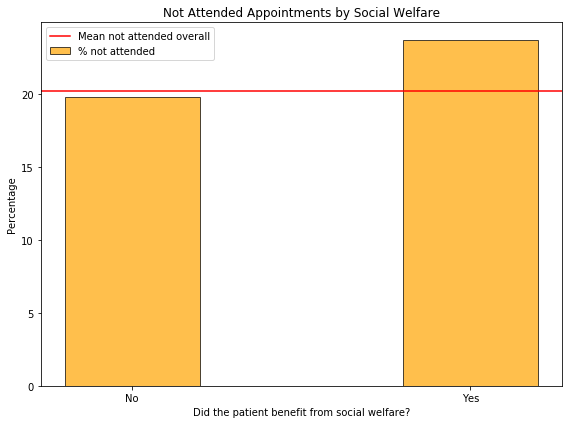

In [68]:
plt.figure(figsize=(8, 6))
x_ind = np.arange(len(df_welfare_fac['total'])) 
width = 0.4
plt.bar(x_ind, df_welfare_fac['no_show_up_%'], width, color='orange', edgecolor='black', alpha=0.7, label='% not attended')
locations = x_ind
plt.xticks(locations, labels)
plt.axhline(y=pct_no_show_up, color='r', linestyle='-', label='Mean not attended overall')
plt.title('Not Attended Appointments by Social Welfare')
plt.xlabel('Did the patient benefit from social welfare?')
plt.ylabel('Percentage')
plt.tight_layout()
plt.legend();

We can see here a clear gap between both groups: the non-attendance percentage rate of patients with social welfare is 3.9 percentage points higher than the non-attendance percentage rate of patients without social welfare.  
<br>
  Let's take a closer look and observe whether the factor age also has an influence in this group.

In [69]:
# filters for appointments with scholarship (attended and non-attended) by age
t = df.query('scholarship == "Yes"').groupby('age').size()
nsu = df.query('scholarship == "Yes"').query('no_show == "Yes"').groupby('age').size()
su = df.query('scholarship == "Yes"').query('no_show == "No"').groupby('age').size()

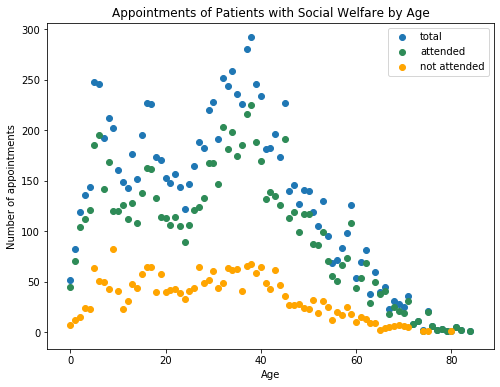

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(t.index, t, label='total')
plt.scatter(su.index, su, c='seagreen', label='attended')
plt.scatter(nsu.index, nsu, c='orange', label='not attended')
plt.xlabel('Age')
plt.ylabel('Number of appointments')
plt.title('Appointments of Patients with Social Welfare by Age')
plt.legend();

The largest gaps between attended and non-attended appointments were found in patients aged around 30 to 50 years. At these ages, patients receiving welfare benefits attend at their appointments more often.  
For younger patients (< 30 years old) and older patients (> 50 years old), the factor age has less influence on the attendance.

<a id='sms'></a>
### 3.6. Sms received
Were the patients who received a reminder sms more likely to attend their appointment?  
To answer this question, we're going to create a new dataframe *df_sms_att* and analyse the percentage rate of non-attendance.

In [71]:
# series for factor 'sms_received' in total (t), showed up (su) and not showed up (nsu)
t = df['sms_received']
su = df[show_up]['sms_received']
nsu = df[no_show_up]['sms_received']

In [72]:
# new dataframe 'df_sms_att' resulting from calling function df_byattendance
df_sms_att = df_byattendance(t, su, nsu)
df_sms_att

,total,total_%,show_up,show_up_%,no_show_up,no_show_up_%
0,75039,67.9,62509,70.9,12530,56.2
1,35482,32.1,25698,29.1,9784,43.8


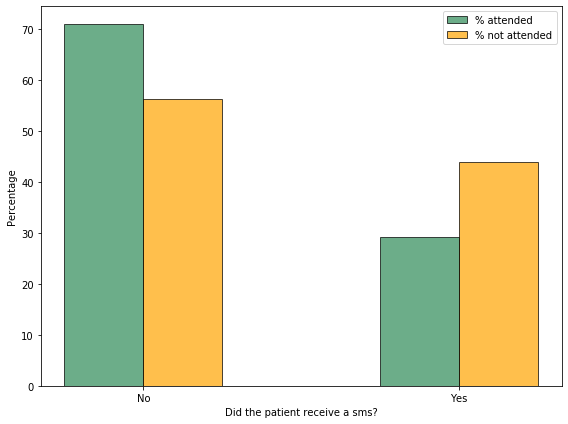

In [73]:
plt.figure(figsize=(8, 6))
x_ind = np.arange(len(df_sms_att['show_up_%'])) 
width = 0.25
plt.bar(x_ind, df_sms_att['show_up_%'], width, color='seagreen', edgecolor='black', alpha=0.7, label='% attended')
plt.bar(x_ind + width, df_sms_att['no_show_up_%'], width, color='orange', edgecolor='black', alpha=0.7, label='% not attended')
labels = ['No', 'Yes']
locations = x_ind + width / 2
plt.xticks(locations, labels)
plt.xlabel('Did the patient receive a sms?')
plt.ylabel('Percentage')
plt.tight_layout()
plt.legend();

32.1% of all appointments have been reminded by sms. The percentage rate of missed appointments that were reminded by sms is noticeably higher: 43.8%.  
So were patients who received a sms more likely to miss their appointment?

In [74]:
# new dataframe 'df_sms_fac' resulting from calling function df_byfactor - missed appointments by sms status
df_sms_fac = df_byfactor(t, su, nsu)
df_sms_fac

,total,total_%,show_up,show_up_%,no_show_up,no_show_up_%
0,75039,100.0,62509,83.3,12530,16.7
1,35482,100.0,25698,72.4,9784,27.6


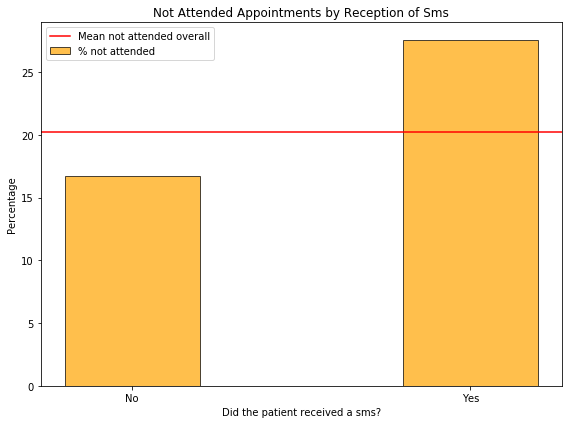

In [75]:
plt.figure(figsize=(8, 6))
x_ind = np.arange(len(df_sms_fac['total'])) 
width = 0.4
plt.bar(x_ind, df_sms_fac['no_show_up_%'], width, color='orange', edgecolor='black', alpha=0.7, label='% not attended')
locations = x_ind
plt.xticks(locations, labels)
plt.axhline(y=pct_no_show_up, color='r', linestyle='-', label='Mean not attended overall')
plt.title('Not Attended Appointments by Reception of Sms')
plt.xlabel('Did the patient received a sms?')
plt.ylabel('Percentage')
plt.tight_layout()
plt.legend();

About 28% of the patients who received a sms didn't show up to their appointments. This is a big contrast to the 16.7% of patients who also didn't show up but didn't received a sms.  
Let's make another observation about this factor: Did the age of the patients also have an influence on the attendance?

In [76]:
# filters for appointments with sms (attended and non-attended) by age
t = df.query('sms_received > 0').groupby('age').size()
nsu = df.query('sms_received > 0').query('no_show == "Yes"').groupby('age').size()
su = df.query('sms_received > 0').query('no_show == "No"').groupby('age').size()

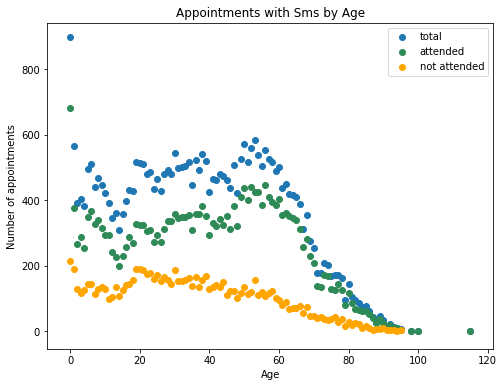

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(t.index, t, label='total')
plt.scatter(su.index, su, c='seagreen', label='attended')
plt.scatter(nsu.index, nsu, c='orange', label='not attended')
plt.xlabel('Age')
plt.ylabel('Number of appointments')
plt.title('Appointments with Sms by Age')
plt.legend();

We can see, that patients who have received a sms are more likely to attend at their appointment if they are between 50 and 70 years old.  
The receipt of a sms has a quite small influence on the attendance when patients are around 15 to 25 years old.  

<a id='neigh'></a>
### 3.7. Neighbourhood
Let's take a closer look to the locations where the appointments took place. Did the location have an impact on the attendance at the appointments?

In [78]:
# number of locations where appointments took place
df['neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4430
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [79]:
# mean number of appointments for each location
df['neighbourhood'].value_counts().mean()

1364.4567901234568

In total there were 81 locations. The average number of appointments for each location is 1364. As the number of locations is quite high, we'll concentrate on the 15 locations with the largest number of appointments.

In [80]:
places = df['neighbourhood'].value_counts().nlargest(15)
places.sum(), places.sum()/total*100

(53402, 48.318419123967395)

The 15 largest locations represent about 48% of all appointments.

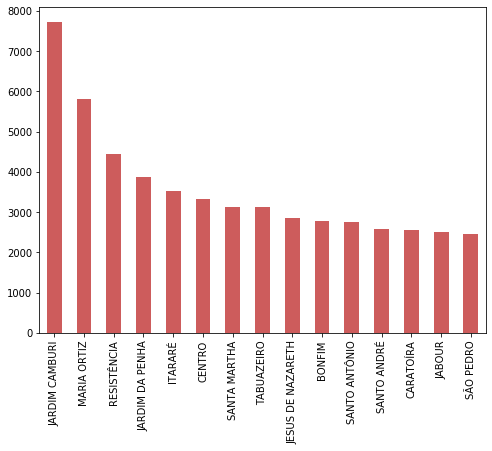

In [81]:
# exploratory plot of the 15 largest locations
places.plot(kind='bar', color='indianred', figsize=(8,6));

This visualization shows the 15 largest locations in term of number of appointments. These places will be the basis of our analysis.

In [82]:
# dataframe of all appointments that took place in one of the 15 selected locations
places_names = places.keys() # selection of the names of the 15 locations
df_locations = df[df['neighbourhood'].isin(places_names)]
df_locations

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_period_days
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,0,0,No,0
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,0,0,No,0
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,0,0,No,0
24,8734857996885.0,5641780,F,2016-04-29,2016-04-29,65,TABUAZEIRO,No,No,No,No,0,0,No,0
28,5926171692527.0,5642400,M,2016-04-29,2016-04-29,51,SÃO PEDRO,No,No,No,No,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,No,No,No,No,0,1,No,35
110523,3596266328735.0,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,No,No,No,No,0,1,No,35
110524,15576631729893.0,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,No,No,No,No,0,1,No,41
110525,92134931435557.0,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,No,No,No,No,0,1,No,41


In [83]:
# series resulting from queries - needed for the next step
nbh_all = df_locations.groupby('neighbourhood').size()
nbh_nsu = df_locations.query('no_show == "Yes"').groupby('neighbourhood').size()
nbh_su = df_locations.query('no_show == "No"').groupby('neighbourhood').size()

In [84]:
# new dataframe 'neighb' which contains number of apointments and percentage comparison per factor location
neighb = pd.concat([nbh_all, nbh_su, nbh_nsu], axis=1, keys=['total', 'su', 'nsu'])
neighb['su_%'] = neighb['su'] / neighb['total'] * 100
neighb['nsu_%'] = neighb['nsu'] / neighb['total'] * 100
neighb.sort_values(by='nsu_%', ascending=False, inplace=True)
neighb

,total,su,nsu,su_%,nsu_%
neighbourhood,,,,,
ITARARÉ,3514,2591,923,73.7,26.3
JESUS DE NAZARETH,2853,2157,696,75.6,24.4
CARATOÍRA,2565,1974,591,77.0,23.0
CENTRO,3334,2631,703,78.9,21.1
SÃO PEDRO,2448,1933,515,79.0,21.0
MARIA ORTIZ,5805,4586,1219,79.0,21.0
RESISTÊNCIA,4430,3525,905,79.6,20.4
BONFIM,2773,2223,550,80.2,19.8
SANTO ANDRÉ,2571,2063,508,80.2,19.8


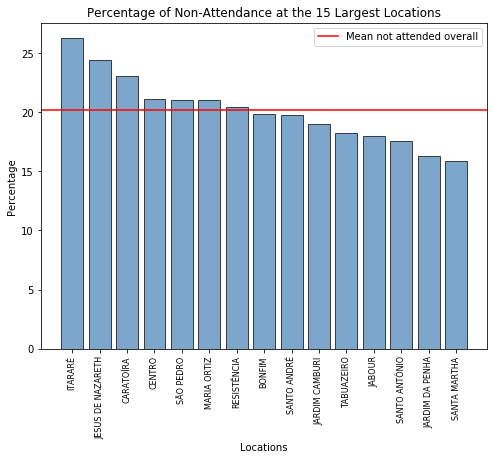

In [85]:
plt.figure(figsize=(8, 6))
x_ind = np.arange(len(places_names)) 
heights = neighb['nsu_%']
plt.bar(x_ind, heights, color='steelblue', edgecolor='black', alpha=0.7)
plt.xticks(x_ind, neighb.index, fontsize=8, rotation=90)
plt.xlabel('Locations')
plt.ylabel('Percentage')
plt.title('Percentage of Non-Attendance at the 15 Largest Locations')
plt.axhline(y=pct_no_show_up, color='r', linestyle='-', label='Mean not attended overall')
plt.legend();

Six locations were above the overall mean of 20.19% non-attendance. Especially the locations *ITARARÉ* (26.3%),  *JESUS DE NAZARETH* (24.4%) and *CARATOÍRA* (23%) had high non-attendance percentage rates.

<a id='mul'></a>
### 3.8. Patients with multiple appointments versus patients with a single appointment
Did patients with more than one appointment miss their appointments more often than patients with a single appointment?  
First, let's have a look at the attendance percentage rate of patients with multiple appointments. Then, we'll analyse the patients with a single appointment.

In [86]:
# select the ids of patients with more than one appointment
x = df.groupby('patient_id').size()
mul_app = x[x > 1].keys() # patients ids with multiple appointments

In [87]:
# dataframe 'df_mul_app' of the patients with multiple appointments
df_mul_app = df[df['patient_id'].isin(mul_app)]
df_mul_app.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_period_days
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,0,0,No,0
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,0,0,No,0
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,No,No,No,No,0,0,No,0
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,0,0,No,0
5,95985133231274.0,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,No,Yes,No,No,0,0,No,2


In [88]:
# repartition of the attendance for patients with multiple appointments
df_mul_app['no_show'].value_counts()

No     57406
Yes    15195
Name: no_show, dtype: int64

In [89]:
# select the ids of patients with only one appointment
one_app = x[x == 1].keys()

In [90]:
# dataframe 'df_one_app' of the patients with one appointment
df_one_app = df[df['patient_id'].isin(one_app)]
df_one_app.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_period_days
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,0,0,No,0
6,733688164476661.0,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,No,No,No,No,0,0,Yes,2
8,56394729949972.0,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,No,No,No,No,0,0,No,0
9,78124564369297.0,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,No,No,No,No,0,0,No,2
10,734536231958495.0,5630213,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,No,No,No,No,0,0,No,2


In [91]:
# repartition of the attendance for patients with one appointment
df_one_app['no_show'].value_counts()

No     30801
Yes     7119
Name: no_show, dtype: int64

In [92]:
# new dataframe 'df_app' resulting from concatenation of 'df_mul_app' and 'df_one_app' & percentage calculation for each selection
df_app = pd.concat([df_mul_app['no_show'].value_counts(), 
            df_mul_app['no_show'].value_counts(normalize=True).mul(100),
            df_one_app['no_show'].value_counts(), 
            df_one_app['no_show'].value_counts(normalize=True).mul(100),],axis=1, 
            keys=('mul_app', 'mul_app_%','one_app','one_app_%'))
df_app

,mul_app,mul_app_%,one_app,one_app_%
No,57406,79.1,30801,81.2
Yes,15195,20.9,7119,18.8


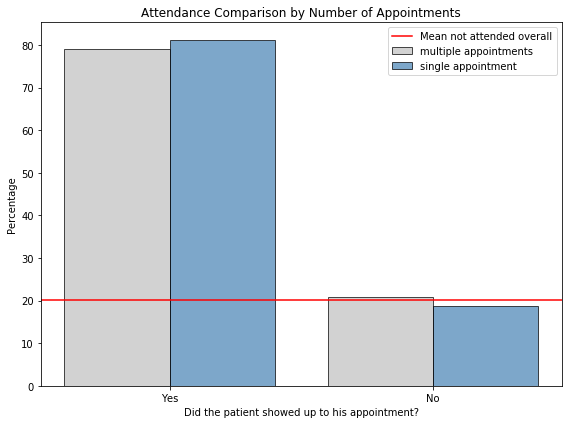

In [93]:
plt.figure(figsize=(8, 6))
x_ind = np.arange(len(df_app['one_app'])) 
width = 0.4
plt.bar(x_ind, df_app['mul_app_%'], width, color='silver', edgecolor='black', alpha=0.7, label='multiple appointments')
plt.bar(x_ind + width, df_app['one_app_%'], width, color='steelblue', edgecolor='black', alpha=0.7, label='single appointment')
labels = ['Yes', 'No']
locations = x_ind + width / 2
plt.xticks(locations, labels)
plt.axhline(y=pct_no_show_up, color='r', linestyle='-', label='Mean not attended overall')
plt.title('Attendance Comparison by Number of Appointments')
plt.xlabel('Did the patient showed up to his appointment?')
plt.ylabel('Percentage')
plt.tight_layout()
plt.legend();

Patients with multiple appointements were slightly more likely to miss their appointments (20.9%) than patients who had only one appointment (18.8%). These non-attendance averages are very close to the overall non-attendance percentage rate of 20.19%.

<a id='wait'></a>
### 3.9. Waiting Periods
How much did waiting periods between schedule and appointment affect the attendance at appointments?  
Let's first take a look at some statistics (mean, median) of the factor waiting time.

In [94]:
# series of factor 'waiting_period_days' in total (t), showed up (su) and not showed up (nsu)
t = df['waiting_period_days']
su = df[show_up]['waiting_period_days']
nsu = df[no_show_up]['waiting_period_days']

In [95]:
# mean and median waiting time overall
t.mean(), t.median()

(10.184345056595578, 4.0)

In [96]:
# mean and median waiting time for attended appointments
su.mean(), su.median()

(8.754758692620767, 2.0)

In [97]:
# mean and median waiting time for non-attended appointments
nsu.mean(), nsu.median()

(15.835484449224701, 11.0)

We can see that all medians strongly differ from their corresponding means. Let's make an exploratory plot the distribution of the waiting times:

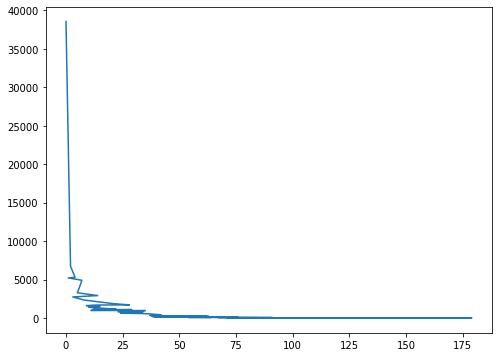

In [98]:
df['waiting_period_days'].value_counts().plot(kind='line', figsize=(8,6));

It seems that waiting periods < 10 are very frequent compared to other waiting times values:

In [99]:
# number of appointments with a waiting time < 10 days
t[t < 10].value_counts()

0    38562
2     6725
4     5290
1     5213
7     4906
6     4037
5     3277
3     2737
8     2332
9     1605
Name: waiting_period_days, dtype: int64

38562 appointments had a waiting time = 0 days. This high number compared to the other waiting time values explains the deviations between the means and medians.

In [100]:
# indexes of the nsu waiting times greater than the nsu mean waiting time (15.85 days) 
ind = list(nsu[nsu > nsu.mean()].index)

In [101]:
# new dataframe 'df_waiting_fac' resulting from calling function df_byfactor - missed appointments by waiting days
df_waiting_fac = df_byfactor(t, su, nsu)
df_waiting_fac

,total,total_%,show_up,show_up_%,no_show_up,no_show_up_%
0,38562,100.0,36770.0,95.4,1792.0,4.6
1,5213,100.0,4100.0,78.6,1113.0,21.4
2,6725,100.0,5123.0,76.2,1602.0,23.8
3,2737,100.0,2093.0,76.5,644.0,23.5
4,5290,100.0,4059.0,76.7,1231.0,23.3
...,...,...,...,...,...,...
155,10,100.0,4.0,40.0,6.0,60.0
162,11,100.0,9.0,81.8,2.0,18.2
169,8,100.0,7.0,87.5,1.0,12.5
176,16,100.0,10.0,62.5,6.0,37.5


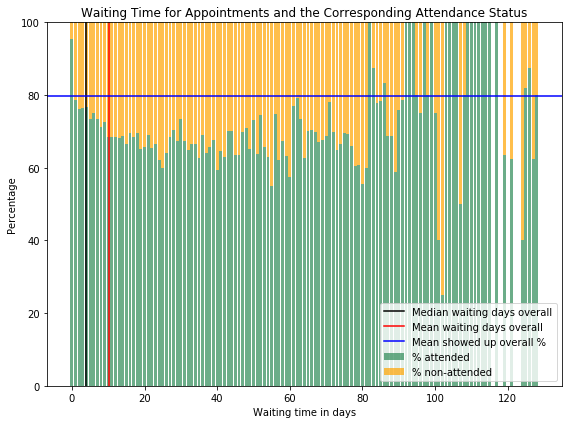

In [102]:
plt.figure(figsize=(8, 6))
x_ind = np.arange(len(df_waiting_fac['total'])) 
plt.bar(x_ind, df_waiting_fac['show_up_%'], alpha=0.7, color='seagreen', label='% attended')
plt.bar(x_ind, df_waiting_fac['no_show_up_%'], bottom=df_waiting_fac['show_up_%'], alpha=0.7, color='orange', label='% non-attended')
plt.axvline(t.median(), color='black', label='Median waiting days overall')
plt.axvline(t.mean(), color='red', label='Mean waiting days overall')
plt.axhline(y=pct_show_up, color='b', linestyle='-', label='Mean showed up overall %')
plt.ylabel('Percentage')
plt.xlabel('Waiting time in days')
plt.title('Waiting Time for Appointments and the Corresponding Attendance Status')
plt.tight_layout()
plt.legend();

We can cleary see, that the mean value of the total number of appointments attended, which is 79,81% (blue line), is higher than most of the attended percentage rates per waiting period (green bars).  
This is due to the 38562 waiting periods of 0 days. This waiting period accounts for 34.89% of all appointments and, with an attendance percentage rate of 95.4%, is well above the mean value of appointments attended (79,81%).  
The high percentage rates for attended appointments for waiting periods over 85 days should not have a great influence on the overall mean of attended appointments, since only 330 appointments with waiting periods over 85 days are included in our dataset.  
  
  Let's calculate the overall mean attendance where all waiting periods equal to 0 day have been excluded:

In [103]:
# mean attendance and non-attendance percentage rates with all waiting times included
df['no_show'].value_counts(normalize=True).mul(100)

No    79.8
Yes   20.2
Name: no_show, dtype: float64

In [104]:
# mean attendance and non-attendance percentage rates with waiting time = 0 excluded
df.query('waiting_period_days != 0')['no_show'].value_counts(normalize=True).mul(100)

No    71.5
Yes   28.5
Name: no_show, dtype: float64

In average, 20.2% of all appointments are unattended. If we exclude the waiting period equals to 0 days, 28.5% of alle appointments are unattended.  
To visualize the differences of unattendance between the different waiting periods, let's plot the average percentage of  unattended appointments. We're also going to group the waiting periods in bins of 20 days.

In [105]:
# mean unattendance at appointments grouped in waiting period bins of 20 days (scaled from 0 days to 80+ days)
w_0 = df.query('waiting_period_days == 0')['no_show'].value_counts(normalize=True).mul(100)['Yes']
w_1 = df.query('0 < waiting_period_days < 20')['no_show'].value_counts(normalize=True).mul(100)['Yes']
w_20 = df.query('20 <= waiting_period_days < 40')['no_show'].value_counts(normalize=True).mul(100)['Yes']
w_40 = df.query('40 <= waiting_period_days < 60')['no_show'].value_counts(normalize=True).mul(100)['Yes']
w_60 = df.query('60 <= waiting_period_days < 80')['no_show'].value_counts(normalize=True).mul(100)['Yes']
w_80 = df.query('waiting_period_days >= 80')['no_show'].value_counts(normalize=True).mul(100)['Yes']

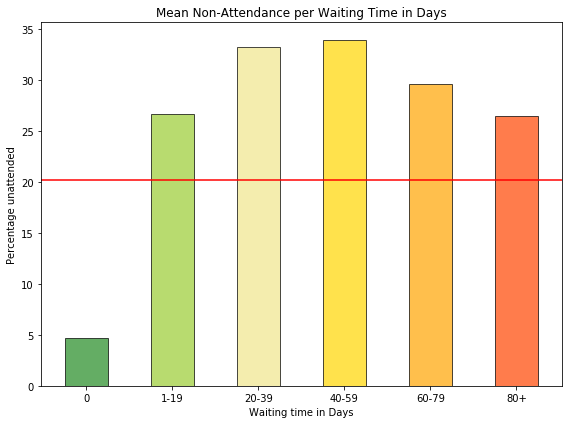

In [106]:
plt.figure(figsize=(8, 6))
width = 0.50
plt.bar(1, w_0, width, color='forestgreen', edgecolor='black', alpha=0.7)
plt.bar(2, w_1, width, color='yellowgreen', edgecolor='black', alpha=0.7)
plt.bar(3, w_20, width, color='khaki', edgecolor='black', alpha=0.7)
plt.bar(4, w_40, width, color='gold', edgecolor='black', alpha=0.7)
plt.bar(5, w_60, width, color='orange', edgecolor='black', alpha=0.7)
plt.bar(6, w_80, width, color='orangered', edgecolor='black', alpha=0.7)
plt.axhline(y=pct_no_show_up, color='r', linestyle='-', label='Mean not attended overall')
labels = ['0', '1-19', '20-39', '40-59', '60-79', '80+']
locations = (1,2,3,4,5,6)
plt.xticks(locations, labels)
plt.title('Mean Non-Attendance per Waiting Time in Days')
plt.xlabel('Waiting time in Days')
plt.ylabel('Percentage unattended')
plt.tight_layout();

The highest unattendance percentage rate concerns appointments with a waiting time between 40 and 59 days.

<a id='conclusions'></a>
## 4. Conclusions
Here are the findings from the analysis. All these results are only observations and do not imply any causation.

#### Question 1:  
Which factors had an impact on the attendance at appointments and which factors did not?

 - Gender:  
 The factor gender hadn't a strong influence on the attendance of appointments. Unattended appointments were done by 34.6% male and 65.4% female. This distribution is very similar to the overall distribution of appointment by gender: 35.7% male and 64.3% female.  
 Men miss their appointments only slighty less often than women: 20,3% of the women and 20.0% of the men didn't show up to their appointments.

- Age:  
The factor age seems to have an influence on the non-attendance at appointments. The median age of patients who didn't show up for their appointment is 33 years. The median age for attended appointments is 38 years.
The highest percentage rate of non-attended appointments is made by patients between 10 and 30 years of age.

- Diseases:  
All diseases and disabilities (hypertension, alcoholism, diabetes, handicap) were analysed together in this category.
In average, the factor diseases had a slightly positive influence on the attendance at appointments: Patients with diseases and/or disabilities werw more likely to come to their appointment than patients without these diseases. Patients with hypertension in particular were only 17.3% of the cases that did not come to their appointment. This is 2,9 percent point lower than the mean non-attendance of 20,2%. 

- Scholarship / social welfare:  
The factor social welfare seems to have an influence on the non-attendance at appointments: 9,8% of all appointments were made by patients who benefit from welfare aids. Unattended appointments were done in 11,6% of the cases by patients who received social welfare.  
The non-attendance percentage rate of patients with social welfare is 3.9 percentage points higher (23.7%) than the non-attendance percentage rate of patients without social welfare (19.8%).  
Because of this strong deviation, we checked another factor of the appointments made by patients with social welfare: the age. We found out that younger patients (< 30 years old) and older patients (> 50 years old) who benefit from social welfare were more likely to miss their appointments.

- Receipt of reminder sms:  
The factor sms also seems to have an influence on the non-attendance at appointments: 32.1% of all appointments have been reminded by sms. The percentage rate of missed appointments that were reminded by sms is noticeably higher: 43.8%.  
Also, about 28% of the patients who received a sms didn't show up to their appointments. This is a big contrast to the 16.7% of patients who didn't received a sms and also didn't show up.
Because of this strong deviation, we checked another factor of the appointments made by patients who received a sms: the age.
We observed that patients who have received a sms are more likely to attend at their appointment if they are between 50 and 70 years old.
The receipt of a sms has a quite small influence on the attendance when patients are around 15 to 25 years old. 


- Neighbourhood / Locations:  
The factor Neighbourhood hadn't a strong influence on the attendance of appointments. Due to the high number ob locations in the dataset, we selected the 15 largest locations in terms of number of appointments.  
Six locations are above the overall mean of 20.19% non-attendance. Especially the locations ITARARÉ (26.3%), JESUS DE NAZARETH (24.4%) and CARATOÍRA (23%) had high non-attendance percentage rates.  
JARDIM CAMBURI, which was the location with the largest number of appointments (7717), had a non-attendance percentage rate of 19.0 %.

#### Question 2:  
Were patients, who had multiple appointments, more likely to miss their appointments as patients who had only one appointment?

Patients with multiple appointements were slightly more likely to miss their appointments (20.9%) than patients who had only one appointment (18.8%). However, these non-attendance averages are very close to the overall non-attendance percentage rate of 20.19%. It seems, therefore, that the factor "multiple appointments" has not strong influence on the non-attendance at appointments.

#### Question 3:  
Did the waiting time between the date of appointment registration and the date of the actual appointment had an effect on the attendance? 

Yes, the waiting time had an impact on the attendance to appointments. The first noticeable point is the gap between mean and median waiting times. It turned out that this was due to a high number of appointments (38562 - 34.89% of all appointments) that had a waiting period of 0 days.  
This high number could result from spontaneous / urgent appointments.  
Most of the attended percentage rates per waiting period were below the mean attending percentage rate overall (79.81%). Only the waiting period of 0 days was an outlier because of its attending percentage rate of 95.4%. The attendance percentage rate of the waiting period of 0 days therefore clearly had an influence on the mean attending percentage rate overall (79.81%). To visualize this, we excluded the waiting period equal to 0 days and calculated a new mean value: 28.5% of alle appointments are unattended.  
The highest unattendance percentage rate concerns appointments with a waiting time between 40 and 59 days.

### Limitations:
- This analysis is limited to grouping the availabe information into attended and non-attended appointments.
- This analysis is based solely on observations and descriptions of the factors available in the dataset. There is no predictions.
- A few data has been removed from the dataset, but only those that were obviously wrong (Minus Age, Schedule date after appointment date). We didn't find any duplicates or NaN values.
- We assumed that all data entries with age = 0 concerned babies. However it cannot be excluded that the value 0 stands for missing data.
- The analysis about locations has been delimited to the 15 largest locations in term of number of appointments. This might not be sufficient for proper observations.

Footnote 1: https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia